* Name:Shubham Sahu
* Roll Number:12041430
* References Used to Complete the Assignment
    * a.https://keras.io/examples/generative/vae/#build-the-decoder



In [1]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bus.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/car.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bicycle.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/truck.npy

--2022-11-27 16:15:15--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 173.194.192.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118872512 (113M) [application/octet-stream]
Saving to: ‘airplane.npy’

airplane.npy        100%[===================>] 113.37M   244MB/s    in 0.5s    

2022-11-27 16:15:16 (244 MB/s) - ‘airplane.npy’ saved [118872512/118872512]

--2022-11-27 16:15:16--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bus.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 173.194.192.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130307152 (124M) [application/

In [2]:
from tensorflow import keras  
from keras.models import Model  
from keras import Input  
from keras.layers import Dense, Lambda  
from tensorflow.keras.utils import plot_model 
from keras import backend as K 
import numpy as np  
import matplotlib 
import matplotlib.pyplot as plt  

import graphviz  
import plotly

import sys
import os

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers

In [3]:
import struct
import numpy

def read_npy_chunk(filename, start_row, num_rows):

    assert start_row >= 0 and num_rows > 0
    with open(filename, 'rb') as fhandle:
        major, minor = numpy.lib.format.read_magic(fhandle)
        shape, fortran, dtype = numpy.lib.format.read_array_header_1_0(fhandle)
        assert not fortran, "Fortran order arrays not supported"
        # Make sure the offsets aren't invalid.
        assert start_row < shape[0], (
            'start_row is beyond end of file'
        )
        assert start_row + num_rows <= shape[0], (
            'start_row + num_rows > shape[0]'
        )
        # Get the number of elements in one 'row' by taking
        # a product over all other dimensions.
        row_size = numpy.prod(shape[1:])
        start_byte = start_row * row_size * dtype.itemsize
        fhandle.seek(start_byte, 1)
        n_items = row_size * num_rows
        flat = numpy.fromfile(fhandle, count=n_items, dtype=dtype)
        return flat.reshape((-1,) + shape[1:])

air=read_npy_chunk('airplane.npy',0,25000)
bc=read_npy_chunk('bicycle.npy',0,25000)
bus=read_npy_chunk('bus.npy',0,25000)
car=read_npy_chunk('car.npy',0,25000)
truck=read_npy_chunk('car.npy',0,25000)


In [4]:
air.shape

(25000, 784)

In [ ]:
bc.shape

(25000, 784)

In [ ]:
bus.shape

(25000, 784)

In [ ]:
car.shape

(25000, 784)

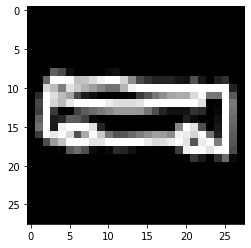

In [ ]:
plt.imshow(bus[9].reshape(28,28),cmap='gray')

In [5]:
car = car.astype('float32')/255
air = air.astype('float32')/255
bc = bc.astype('float32')/255
bus = bus.astype('float32')/255
truck = truck.astype('float32')/255

X = np.concatenate((air, bc, bus, car, truck), axis=0)
X = X
y = np.array([0]*len(air) + [1]*len(bc) +[2]*len(bus) + [3]*len(car) + [4]*len(truck))

indicies = np.arange(len(X))
np.random.shuffle(indicies)
X = X[indicies]
y = y[indicies]

X_train = X[:]

X_train=X_train.reshape((len(X_train), 28, 28, 1))



TSNE

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
tsne = TSNE(n_components=2, verbose=1, random_state=123)
N=100000
z = tsne.fit_transform(X_train[:N].reshape((N, 784))) 
df = pd.DataFrame()
df["y"] = y[:N]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.158s...
[t-SNE] Computed neighbors for 100000 samples in 622.534s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

In [ ]:
plt.figure(figsize=(15,12))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="QuickDraw t-SNE") 

In [ ]:
X_train=np.concatenate((air, bc, bus, car, truck), axis=0)

In [ ]:
X_train.shape
X_train = X_train.astype("float32") / 255
X_train=X_train.reshape((X_train.shape[0],28,28,1))

In [ ]:
car.shape

(25000, 784)

In [ ]:
truck.shape

(25000, 784)

In [ ]:
X_train.shape

(125000, 28, 28, 1)

In [ ]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

####Build Encoder

In [ ]:
latent_dim =8

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

encoder.summary()


# encoder = keras.Sequential(
#     [
#         keras.Input(shape=(28, 28, 1)),
#      layers.Conv2D(32, 3, activation="relu", strides=2, padding="same"),
#      layers.Conv2D(64, 3, activation="relu", strides=2, padding="same"),
# layers.Conv2D(128, 3, activation="relu", strides=2, padding="same"),
# layers.Conv2D(256, 3, activation="relu", strides=2, padding="same"),
# layers.Conv2D(512, 3, activation="relu", strides=2, padding="same")

#     ]
# )

# encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_38 (Conv2D)             (None, 14, 14, 32)   320         ['input_17[0][0]']               
                                                                                                  
 conv2d_39 (Conv2D)             (None, 7, 7, 64)     18496       ['conv2d_38[0][0]']              
                                                                                                  
 flatten_4 (Flatten)            (None, 3136)         0           ['conv2d_39[0][0]']              
                                                                                            

NO 5 dimensions are not enough to genereate good doodles as they were producing unrecognizable doodles. 16  dimensions seem to produce somewhat acceptable doodle.

####Build the decoder

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x) 
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

# decoder = keras.Sequential(
#     [
#         keras.Input(shape=(1, 1, 512)),
#      layers.Conv2DTranspose(256, 3, activation="relu", strides=2, padding="same"),
#      layers.Conv2DTranspose(128, 3, activation="relu", strides=2, padding="same"),
# layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same"),
# layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same"),
# layers.Conv2DTranspose(3, 3, activation="relu", strides=2, padding="same")

#     ]
# )

# decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_9 (Dense)             (None, 3136)              28224     
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_17 (Conv2D  (None, 14, 14, 64)       36928     
 Transpose)                                                      
                                                                 
 conv2d_transpose_18 (Conv2D  (None, 28, 28, 32)       18464     
 Transpose)                                                      
                                                                 
 conv2d_transpose_19 (Conv2D  (None, 28, 28, 1)        289 

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:
car = car.astype("float32") / 255
car=car.reshape((car.shape[0],28,28,1))

In [ ]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(X_train, epochs=40 , batch_size=64)

Epoch 1/40
125000/125000 [==============================] - 502s 4ms/step - loss: 231.0754 - reconstruction_loss: 221.9864 - kl_loss: 6.5243
Epoch 2/40
125000/125000 [==============================] - 497s 4ms/step - loss: 225.4132 - reconstruction_loss: 216.3067 - kl_loss: 7.2644
Epoch 3/40
125000/125000 [==============================] - 488s 4ms/step - loss: 218.9626 - reconstruction_loss: 210.2759 - kl_loss: 8.5224
Epoch 4/40
125000/125000 [==============================] - 491s 4ms/step - loss: 218.2346 - reconstruction_loss: 209.5692 - kl_loss: 8.6680
Epoch 5/40
125000/125000 [==============================] - 487s 4ms/step - loss: 217.9631 - reconstruction_loss: 209.2160 - kl_loss: 8.7239
Epoch 6/40
125000/125000 [==============================] - 478s 4ms/step - loss: 217.5880 - reconstruction_loss: 208.9983 - kl_loss: 8.7637
Epoch 7/40
125000/125000 [==============================] - 472s 4ms/step - loss: 217.6216 - reconstruction_loss: 208.8315 - kl_loss: 8.7927
Epoch 8/40
12

In [ ]:
ai=car.reshape(car.shape[0],28,28)

In [ ]:
car.shape

(25000, 28, 28, 1)

In [ ]:
bi=encoder.predict(car)[2]

782/782 [==============================] - 3s 3ms/step


In [ ]:
bi.shape

(25000, 8)

In [ ]:
out1=decoder.predict(bi)

782/782 [==============================] - 1s 1ms/step


In [ ]:
out1=255*out1

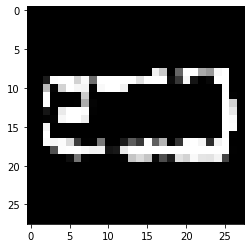

In [ ]:
plt.imshow(out1[100].reshape(28,28),cmap='gray')

####Interpolation

In [ ]:
bus1=bc.reshape((bc.shape[0],28,28))

In [ ]:
truck1=truck.reshape((truck.shape[0],28,28))

In [ ]:
buse=encoder.predict(bus1)[2]

782/782 [==============================] - 1s 2ms/step


In [ ]:
trucke=encoder.predict(truck1)[2]

782/782 [==============================] - 2s 2ms/step


782/782 [==============================] - 1s 2ms/step


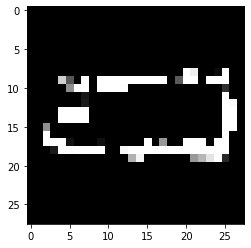

In [ ]:

    outb=decoder.predict((0/10)*buse+(5/10)*trucke)
    
    plt.imshow(outb[20].reshape(28,28),cmap='gray')


In [ ]:
outb.shape

(25000, 28, 28, 1)

In [ ]:
print("enter 1 for bicycle")
print("enter 2 for airplane")
print("enter 3 for car")
print("enter 4 for truck")
print("enter 5 for bus")
